# 特異値分解

In [1]:
import numpy as np
import pandas as pd
import japanize_matplotlib
import matplotlib.pyplot as plt

In [20]:
# 使うデータは1036冊分の小説データの感情スコア値
SCORE_PATH = 'data/all_score_0630.csv'

In [21]:
# pandas dataframeとして読み込む
score_df = pd.read_csv(SCORE_PATH, index_col=0)
score_df.head()

,S00,S01,S02,S03,S04,S05,S06,S07,S08,S09,...,S90,S91,S92,S93,S94,S95,S96,S97,S98,S99
13,0.791536,0.737968,0.829343,0.794293,0.724665,0.707668,0.620669,0.607199,0.584499,0.626389,...,0.754139,0.782878,0.784226,0.576965,0.534152,0.601299,0.612696,0.611167,0.664706,0.736535
24,0.749562,0.727724,0.721075,0.648729,0.764811,0.627247,0.634754,0.640822,0.792777,0.844474,...,0.690379,0.640809,0.828280,0.806064,0.754045,0.906671,0.896347,0.869153,0.901117,0.933473
30,0.473785,0.473785,0.652944,0.622040,0.663769,0.799352,0.982744,0.966812,0.851591,0.907304,...,0.101549,0.142406,0.285570,0.270750,0.320434,0.441094,0.464494,0.548101,0.610829,0.517892
41,0.900899,0.952689,1.000000,0.928408,0.802310,0.760143,0.699925,0.759109,0.660739,0.726829,...,0.094422,0.246499,0.291265,0.373439,0.445357,0.450839,0.390509,0.337263,0.402609,0.459209
47,0.742317,0.836033,0.890097,0.911625,0.967501,0.967501,0.972570,0.982321,1.000000,0.929571,...,0.202141,0.256933,0.256933,0.243298,0.175068,0.204548,0.171354,0.173879,0.108680,0.023454


In [4]:
scores = score_df.to_numpy()
scores[:5].shape

(5, 100)

In [9]:
# 平均値を０にしておく
A = scores - scores.mean(axis=0)
A.shape

(1036, 100)

## PCA

In [10]:
from sklearn.decomposition import PCA

model = PCA()
x = model.fit_transform(A)
x.shape

(1036, 100)

In [11]:
model.components_.shape

(100, 100)

In [13]:
# 寄与率(Top 10)
model.explained_variance_ratio_[:10]

array([0.2803353 , 0.20929572, 0.14457506, 0.10477838, 0.06483455,
       0.05243667, 0.02811643, 0.01357077, 0.01220571, 0.01077935])

In [14]:
# 累積寄与率
max_comp = 20
cumulative_contribution_ratio = [np.sum(model.explained_variance_ratio_[0:i]) for i in range(1, max_comp+1)]
cumulative_contribution_ratio = np.array(cumulative_contribution_ratio)

In [15]:
# 累積寄与率が9割以下
cumulative_contribution_ratio[cumulative_contribution_ratio<=0.9]

array([0.2803353 , 0.48963102, 0.63420607, 0.73898445, 0.80381901,
       0.85625568, 0.88437211, 0.89794288])

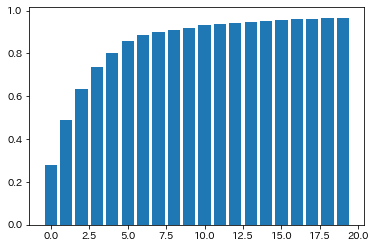

In [17]:
# 累積寄与率の表示
plt.bar(np.arange(max_comp), cumulative_contribution_ratio)
plt.show()

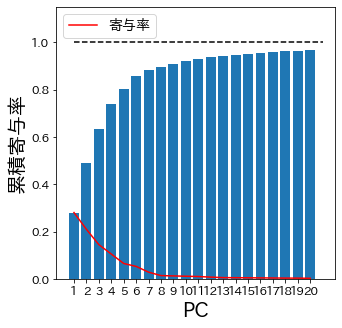

In [18]:
#累積寄与率と寄与率を棒グラフで可視化する
plt.figure(figsize=(5,5))
plt.bar(np.arange(1,max_comp+1),cumulative_contribution_ratio)
plt.plot(np.arange(1,max_comp+1),model.explained_variance_ratio_[:max_comp],color='red',label='寄与率')
plt.xticks(np.arange(1,max_comp+1))
plt.xlabel('PC', size=20)
plt.ylabel('累積寄与率',size=20)
plt.legend(loc='upper left', fontsize=14)
plt.ylim(0,1.15)
plt.tick_params(labelsize=12)
plt.hlines(1,1,21,color='black',linestyles='dashed')
plt.show()

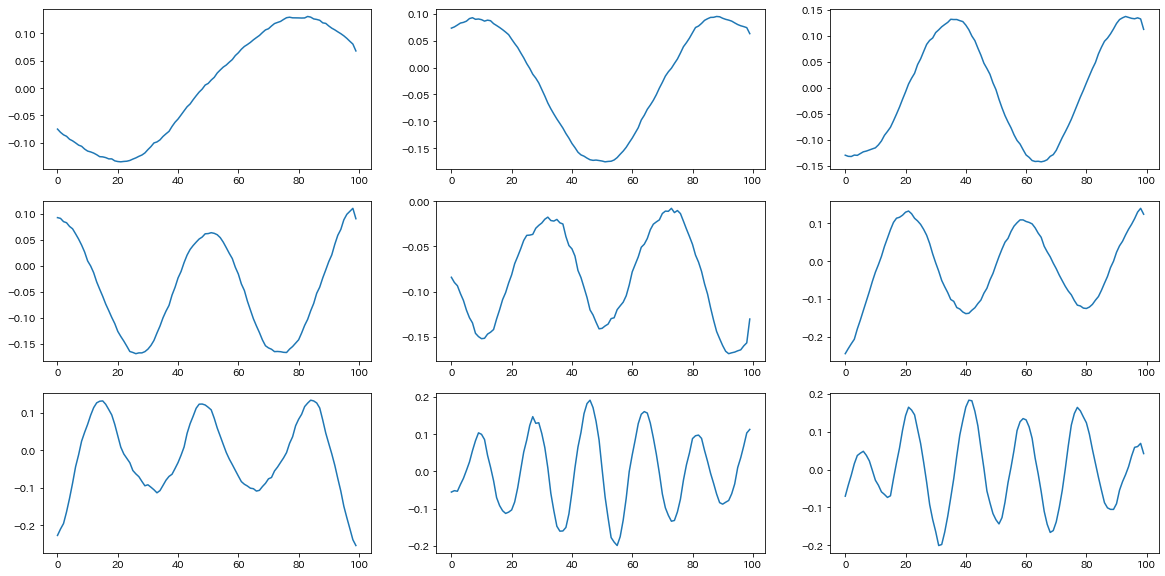

In [19]:
plt.figure(figsize=(20, 10))
for i in range(1, 10):
    plt.subplot(3, 3, i)
    plt.plot(model.components_[i-1])
plt.show()

## PCA2

numpyで実施(参考:https://note.com/noa813/n/na6116484e1b1)

In [48]:
# 平均値を０にしておく
A = scores - scores.mean(axis=0)
A.shape

(1036, 100)

In [49]:
# 共分散行列を作成
cov = np.cov(A, rowvar=False)
cov[:5, :5]

array([[0.08908588, 0.084537  , 0.07948481, 0.07414913, 0.06870453],
       [0.084537  , 0.08476092, 0.08038352, 0.07528857, 0.06999226],
       [0.07948481, 0.08038352, 0.08088845, 0.07660266, 0.0714982 ],
       [0.07414913, 0.07528857, 0.07660266, 0.0775194 , 0.07337842],
       [0.06870453, 0.06999226, 0.0714982 , 0.07337842, 0.07422896]])

In [50]:
# 固有値・固有ベクトルを計算
s, v = np.linalg.eig(cov)
s.shape, v.shape

((100,), (100, 100))

In [51]:
# 固有値の大きい順に固有ベクトルを並べ替え
s_index = np.argsort(s)[::-1]
s_index

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 59, 60, 61, 58, 62, 64, 65, 68, 69, 75,
       70, 71, 76, 82, 84, 86, 91, 87, 88, 93, 99, 92, 94, 90, 97, 98, 95,
       89, 85, 79, 80, 83, 81, 96, 78, 77, 74, 73, 72, 67, 66, 63])

In [52]:
v_ = v[:, s_index]

In [53]:
# n_components個の固有ベクトルを取得
n_components = 2
components = v_[:,:n_components]

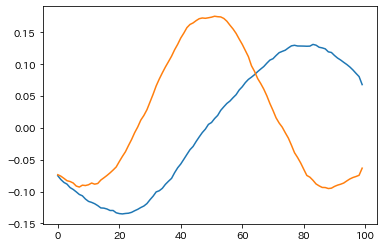

In [54]:
plt.plot(components.T[0])
plt.plot(components.T[1])

In [88]:
# 寄与率表示
np.set_printoptions(suppress=True) 
s_index = np.argsort(s)[::-1]
ratio = s[s_index]/np.sum(s[s_index])
ratio[:10]

array([0.2803353 , 0.20929572, 0.14457506, 0.10477838, 0.06483455,
       0.05243667, 0.02811643, 0.01357077, 0.01220571, 0.01077935])

<BarContainer object of 100 artists>

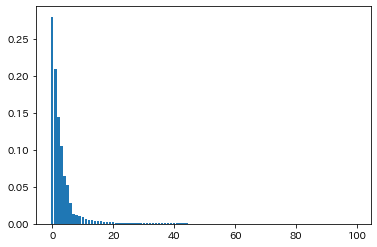

In [68]:
plt.bar(np.arange(ratio.shape[0]), ratio)

<BarContainer object of 20 artists>

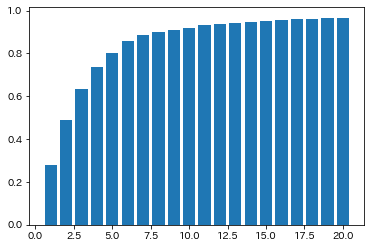

In [87]:
# 累積寄与率
cumulative_ratio = [np.sum(ratio[:i]) for i in np.arange(1, len(ratio)+1)]
n = 20
plt.bar(np.arange(1,n+1), cumulative_ratio[:n])

## SVD

$ A = USV^T = WV^T $

In [107]:
# 平均値を０にしておく
A = scores - scores.mean(axis=0)
A.shape

(1036, 100)

In [108]:
# 特異値分解(Singular Value Decomposition)
U, s, Vh = np.linalg.svd(A, full_matrices=False)

In [135]:
# 戻り値の形を確認
U.shape, s.shape, Vh.shape

((1036, 100), (100,), (100, 100))

$s$は対角成分のみのベクトルとなっている

In [116]:
# W は U x Sで求める
W = U * s
W.shape

(1036, 100)

In [134]:
# 対角行列に変換して内積をとっても同じ
W_2 = U @ np.diag(s)
# 比較
np.all(np.equal(W, W_2))

True

$ A = USV^T = WV^T $

$ V^T $ の行に特徴があらわれる．各行(ベクトル)を mode と呼ぶ．

参考にしたのは先行研究（https://db-event.jpn.org/deim2019/post/papers/350.pdf）

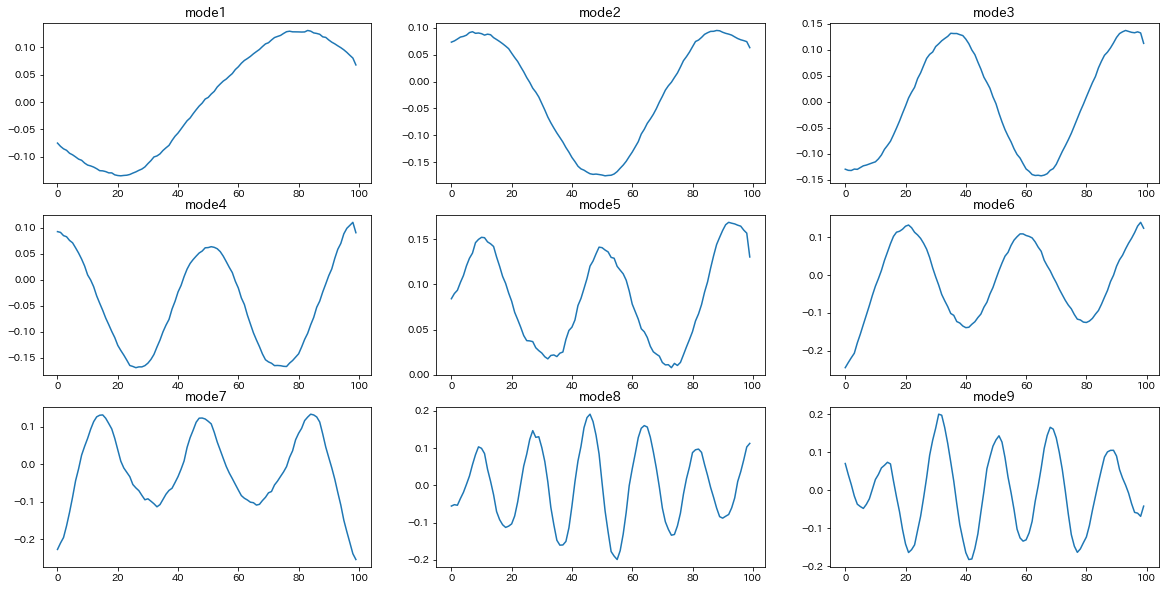

In [147]:
# mode1 - mode9を表示する
plt.figure(figsize=(20, 10))
for i in range(1, 10):
    ax = plt.subplot(3, 3, i)
    ax.set_title(f'mode{i}', fontsize=13)
    ax.plot(Vh[i-1])
plt.show()

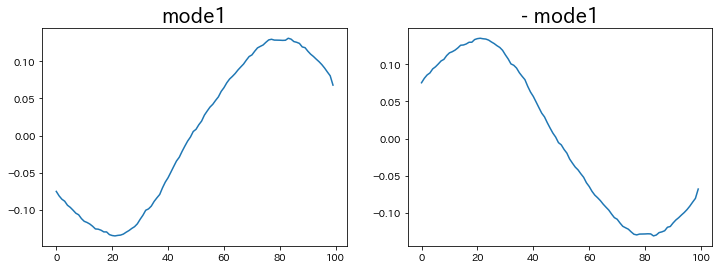

In [160]:
# mode1 を 上下反転させたものを -mode1とする
plt.figure(figsize=(12, 4))

ax1 = plt.subplot(1, 2, 1)
ax1.set_title('mode1', fontsize=20)
ax1.plot(Vh[0])

ax2 = plt.subplot(1, 2, 2)
ax2.set_title('- mode1', fontsize=20)
ax2.plot(-Vh[0])

plt.show()


行列 $W$ の 各行の絶対値の最大値を求める．その最大値がある要素の要素番号に対応する mode が，その小説の特徴を表しているものといえる．

In [205]:
# 各行の各要素の絶対値の最大がある要素番号を取得
max_element_ids = np.argmax(np.abs(W), axis=1)
max_element_ids, max_element_ids.shape
mode_ids = max_element_ids.copy()

In [204]:
# 各行の絶対値最大を取得
max_elements = [W[i, max_element_ids[i]] for i in range(len(max_element_ids))]
print(list(max_elements[:5]))
mode_flg = [1 if max_elements[i] >= 0 else -1 for i in range(len(max_elements))]
print(list(mode_flg[:5]), len(mode_flg))

[1.7161907425495317, 1.4468376983646738, -1.0766648371639602, -1.7625491755004652, -1.966134370711762]
[1, 1, -1, -1, -1] 1036


In [212]:
print(mode_ids[:5], len(mode_ids)) # 対応するmode
print(mode_flg[:5], len(mode_flg)) # mode(i)/-mode(i)

[0 1 0 2 2] 1036
[1, 1, -1, -1, -1] 1036


In [281]:
def get_fontsize(score_num):
    if score_num >= 40:
        return 0.3
    elif score_num >= 20:
        return 0.5
    else:
        return 1

In [295]:
mode_num = [len(mode_ids[mode_ids==i]) for i in np.arange(15)]
mode_num

array([0.39382239, 0.26737452, 0.16119691, 0.09459459, 0.03474903,
       0.02799228, 0.01158301, 0.00482625, 0.00096525, 0.0019305 ,
       0.        , 0.00096525, 0.        , 0.        , 0.        ])

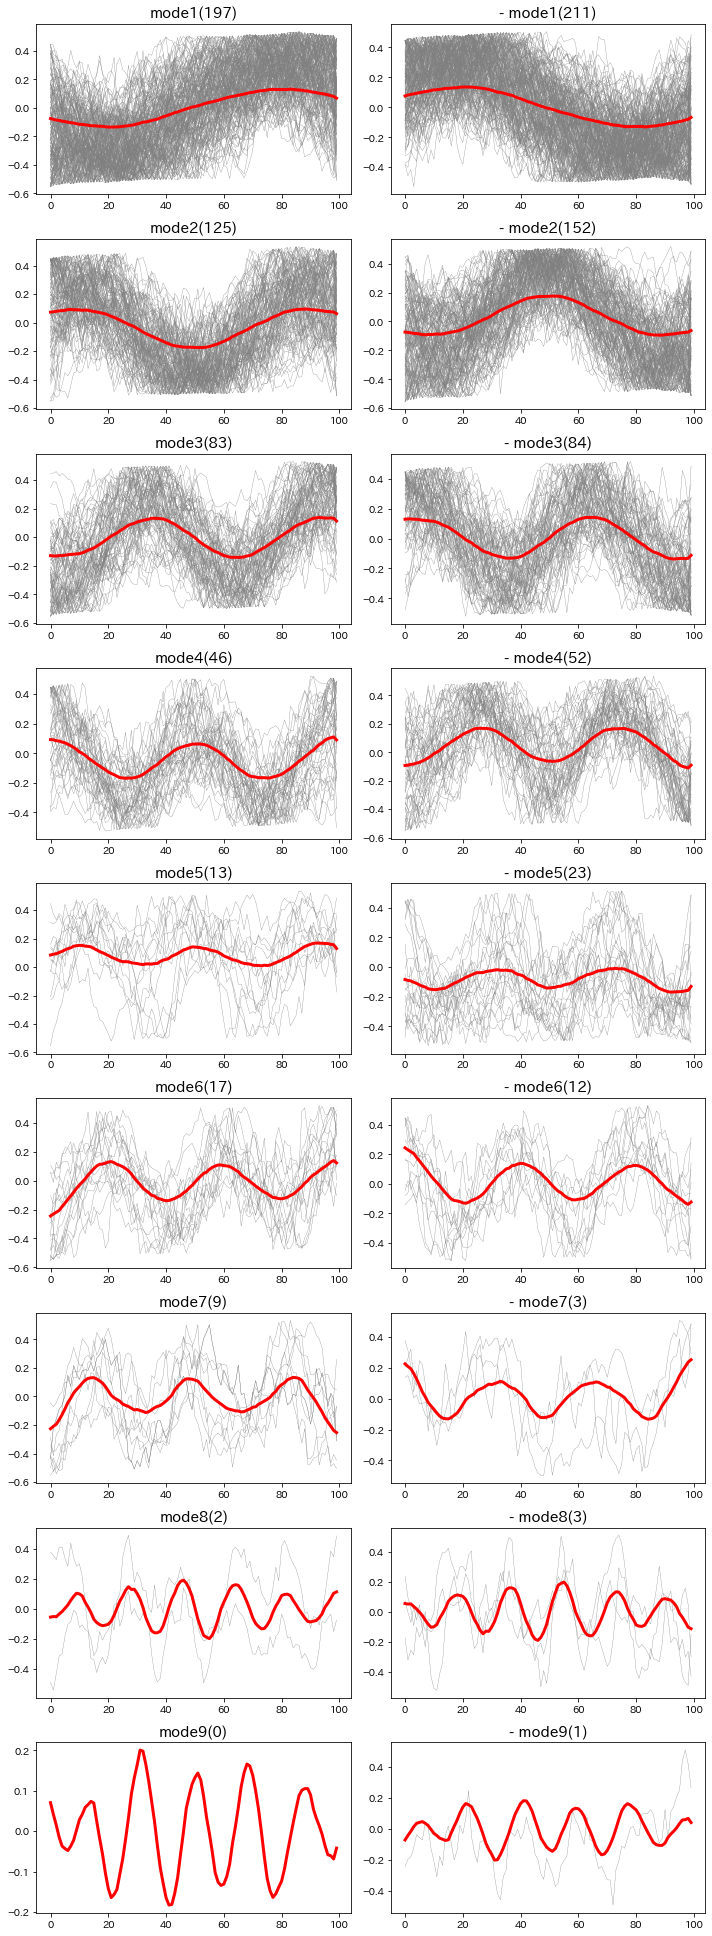

<Figure size 864x288 with 0 Axes>

In [289]:
# 感情曲線の描画
mode_num = 9 # モード数(plotの行数)
fig, axes = plt.subplots(mode_num, 2, figsize=(10, mode_num*3), tight_layout=True)
plt.figure(figsize=(12, 4))

count = np.zeros((mode_num, 2))
for row in np.arange(mode_num):
    for id in range(len(mode_ids)):
        if mode_ids[id] == row:
            col = 0  if mode_flg[id] >= 0 else 1
            count[row][col] += 1
            axes[row, col].plot(A[id], c='gray', linewidth=0.3)
    axes[row, 0].set_title(f'mode{row+1}({int(count[row][0])})', fontsize=15)
    axes[row, 0].plot(Vh[row], c='red', linewidth=3)
    axes[row, 1].set_title(f'- mode{row+1}({int(count[row][1])})', fontsize=15)
    axes[row, 1].plot(-Vh[row], c='red', linewidth=3)

plt.show()


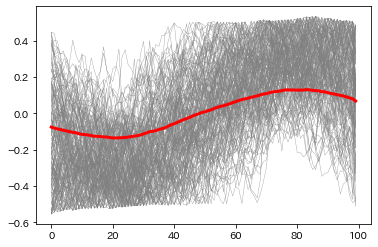

In [252]:
mode_idx = 0
for id in range(len(mode_ids)):
    if mode_ids[id] == mode_idx:
        if mode_flg[id] >= 0:
            plt.plot(A[id], c='gray', linewidth=0.3)
plt.plot(Vh[mode_idx], c='red', linewidth=3)
plt.show()

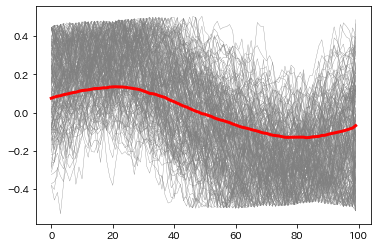

In [251]:
mode_idx = 0
for id in range(len(mode_ids)):
    if mode_ids[id] == mode_idx:
        if mode_flg[id] < 0:
            plt.plot(A[id], c='gray', linewidth=0.3)
plt.plot(-Vh[mode_idx], c='red', linewidth=3)
plt.show()